In [63]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [64]:
#importing the dataset
df = pd.read_csv('data.csv')
df

,id,bedrooms,floors,yr_built,price
0,7129300520,3,1.0,1955,221900.0
1,6414100192,3,2.0,1951,538000.0
2,5631500400,2,1.0,1933,180000.0
3,2487200875,4,1.0,1965,604000.0
4,1954400510,3,1.0,1987,510000.0
...,...,...,...,...,...
395,3649100320,2,1.0,1950,330000.0
396,7375300160,5,1.0,1958,530000.0
397,5175800060,4,1.0,1962,365000.0
398,1604601375,3,1.5,1909,378750.0


In [65]:
X = df.drop(["id","price"],axis =1)
y = df.price

In [66]:
class LinearRegression:
    
    def __init__(self,optimizer= "normal_equation"):
        self.optimizer = optimizer
        self._params = None
        self._coef = None
        self._intercept = None
        
        
    @property
    def params(self):
        return self._params
    
    @params.setter
    def params(self,val):
        self._params = val
        self._intercept= val[0]
        self._coef = val[1:]
    
    @staticmethod    
    def add_ones(X):
        X_size = X.shape[0]
        new_X = np.concatenate([X,np.ones((X_size,1))], axis = 1)
        return new_X
        
    def fit(self,X,y):
        
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
            
        X = self.add_ones(X)
        
        if self.optimizer == "normal_equation":
            self.params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
            
    def predict(self,X):
        X = self.add_ones(X)
        return X.dot(self.params)
    


In [67]:
regr = LinearRegression()
regr.fit(X,y)

parents_specification = np.array([[3,2,1982]])
regr.predict(parents_specification)

array([528772.68309015])

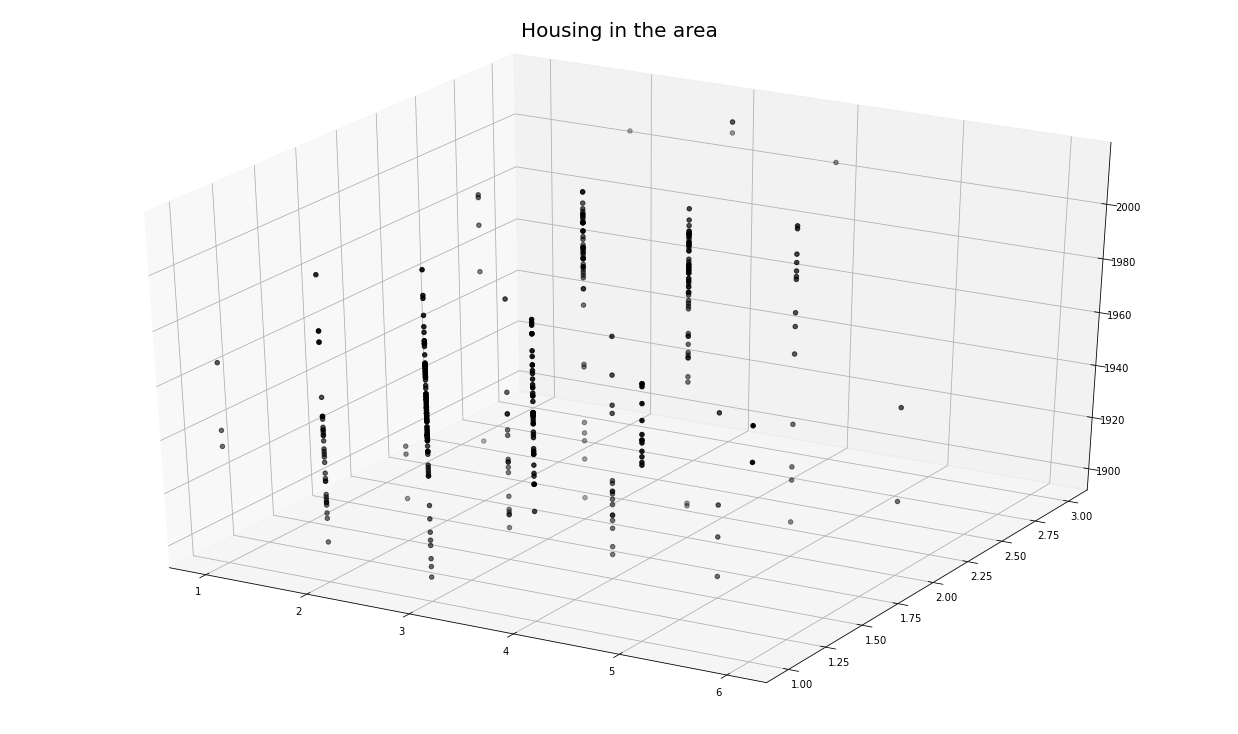

In [68]:
bedrooms = df['bedrooms'].values
floors = df['floors'].values
yr_built = df['yr_built'].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(bedrooms, floors, yr_built, color='#000000')
fig.suptitle('Housing in the area', fontsize=20)              
plt.show()

In [69]:
#from the above scatter plot we can say that barely any houses were built after the 1980's


In [70]:
summary = df.describe()
summary


,id,bedrooms,floors,yr_built,price
count,4.000000e+02,400.000000,400.000000,400.000000,4.000000e+02
mean,4.464979e+09,3.382500,1.423750,1966.867500,5.200269e+05
std,2.894738e+09,0.847342,0.494137,28.473528,3.613449e+05
min,1.151031e+07,1.000000,1.000000,1900.000000,1.530000e+05
25%,1.901075e+09,3.000000,1.000000,1950.000000,2.997500e+05
50%,3.697200e+09,3.000000,1.000000,1968.000000,4.300000e+05
75%,7.247838e+09,4.000000,2.000000,1990.000000,6.266280e+05
max,9.822700e+09,6.000000,3.000000,2014.000000,3.080000e+06
